In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statistics
import scipy.stats
from scipy import stats

In [ ]:
student_perf = '/content/data.csv'
df = pd.read_csv(student_perf)

In [ ]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
print('no of rows:',df.shape[0])
inital_count=df.shape[0]
print('no of columns:',df.shape[1])
print('no of nan/missing values',df.isnull().sum().sum())
print('              ')
datatypes = df.dtypes
print(datatypes)
print("       ")
print('No of null values',df.isnull().sum())# shows null values by column, counts number of true values returned from isnull function

no of rows: 11914
no of columns: 16
no of nan/missing values 3850
              
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object
       
No of null values Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0

In [ ]:
# removing na values
df=df.dropna(axis=0)

In [ ]:
print(df.isnull().sum())
print('   ')
print('Shape of dataframe: ',df.shape)
final_count=df.shape[0]
print('No of rows dropped',inital_count-final_count)

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64
   
Shape of dataframe:  (8084, 16)
No of rows dropped 3830


In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,2012.058634,274.642751,5.778080,3.414151,26.650915,19.553686,1499.397823,5.007267e+04
std,6.317981,115.003475,1.886088,0.898087,7.720473,7.159964,1413.855615,7.029313e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2010.000000,192.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.591875e+04
50%,2015.000000,264.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,3.500500e+04
75%,2016.000000,320.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.872250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
null_hypo=df['Engine HP'].mean()
null_hypo

274.6427511133102

In [ ]:
df['Engine HP'].median()

264.0

In [ ]:
df['Engine HP'].mode()

0    200.0
dtype: float64

In [ ]:
statistics.variance(df['Engine HP'])

13225.7993647427

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


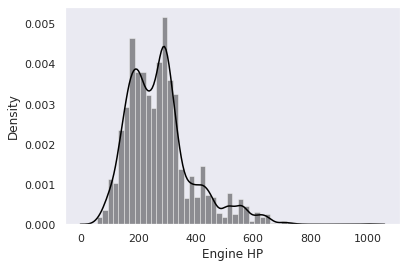

In [ ]:
sns.set(style="dark")
sns.distplot(df['Engine HP'], kde=True, color="black")

In [ ]:
df.shape[0]

8084

In [ ]:
#z test
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

alpha=0.05

ztest_Score, p_value= ztest(df['Engine HP'],value = null_hypo, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis thus null hypothesis true")

Fail to Reject NUll Hypothesis thus null hypothesis true


In [ ]:
#T test

df2=df.head(20)

t_value,p_value=stats.ttest_1samp(df2['Engine HP'],274.64)
two_tailed_p_value=float("{:.6f}".format(p_value))
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one tailed test is %f'%two_tailed_p_value)

alpha = 0.1

if two_tailed_p_value<=alpha:
  print('Null Hypothesis is rejected')

else:
  print('We do not reject the Null Hypothesis ')

Test statistic is -1.537302
p-value for one tailed test is 0.140706
We do not reject the Null Hypothesis 


In [ ]:
print(df2['Engine HP'].mean())

256.55
